In [1]:
# import libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# read the data
df = pd.read_csv('Walmart.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
df['Date'][1].split('-')

['12', '02', '2010']

In [10]:
# Extract day, month and year from the Date column using split function
df['Day'] = df['Date'].apply(lambda x : x.split('-')[0])
df['Month'] = df['Date'].apply(lambda x : x.split('-')[1])
df['Year'] = df['Date'].apply(lambda x : x.split('-')[2])

In [11]:
# save the columns as integer type
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [12]:
# drop the Date column
df.drop('Date', axis = 1, inplace = True)

In [14]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


- What kind target variable are we dealings with? (Continuous, Categorical, Binary, etc.)
-  What kind of model should we use? (Linear regression, KNN, etc.)

# Regression model
- The most popular regression models are 
 - Random Forest
 - Decision Tree
 - Gradient Boosting

In [13]:
# create X, y 

X = df.drop('Weekly_Sales', axis = 1)
y = df['Weekly_Sales']

In [15]:
# split the data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [16]:
# import my models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# create a function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # set random seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [17]:
# create a dictionary of models
models = {'Linear Regression' : LinearRegression(),
            'Decision Tree' : DecisionTreeRegressor(),
            'Random Forest' : RandomForestRegressor()}

# fit and score the models
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'Linear Regression': 0.15548590261520256,
 'Decision Tree': 0.9474470608866961,
 'Random Forest': 0.9578748726913779}

In [18]:
# fit a single model
from sklearn.ensemble import RandomForestRegressor

# instantiate the model
rf = RandomForestRegressor()# add hyperparameters n_estimators - are the number of trees in the forest)

# fit the model to the data
rf.fit(X_train, y_train) # we always fit on the train data

# make predictions
pred = rf.predict(X_test) # always make predictions on the test data

Evaluation of the model
- what kind of model did we use?
- what kind of metric is appropriate for evaluating this kind of model?

For regression the most popular metrics are:
- R2 score
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
# R2
print(rf.score(X_test, y_test))

# MAE
print(mean_absolute_error(y_test, pred)) # what we is we are comparing the distance between the actual and predicted values

# MSE
print(mean_squared_error(y_test, pred))

# RMSE
print(np.sqrt(mean_squared_error(y_test, pred)))

0.9594552151319305
57699.55305097124
13061687517.34128
114287.74001327211


## Bonus

- Check if the model is overfitting or underfitting

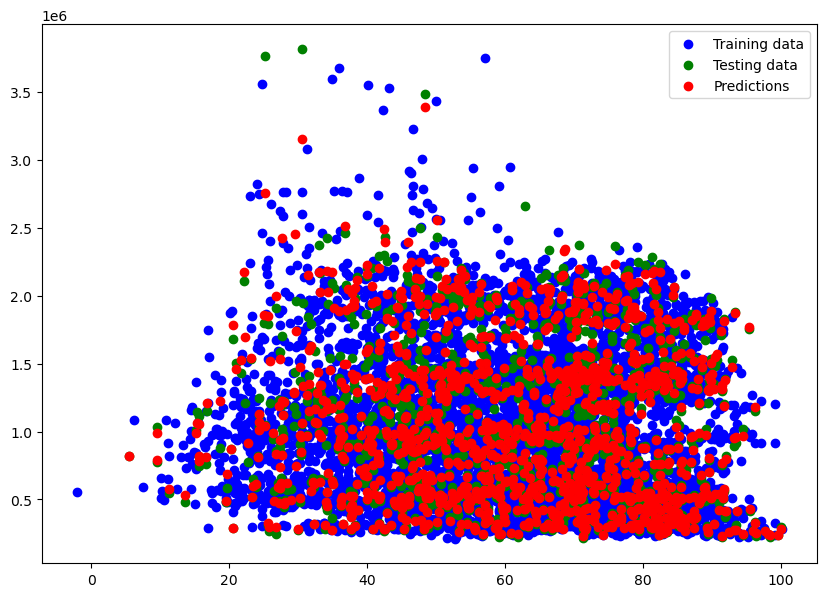

In [21]:
# create a function that will plot and check if we are overfitting or underfitting

def plot_preds(train_data, train_labels, test_data, test_labels, preds):
    """
    Plots training data, test data and compares predictions to actual labels.
    """
    plt.figure(figsize=(10,7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    # plot test data in green
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    # plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, preds, c='r', label='Predictions')
    # show the legend
    plt.legend()

plot_preds(X_train['Temperature'], y_train, X_test['Temperature'], y_test, pred)